In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import tensorflow as tf
import os
import pandas as pd
import cv2

drive_dir = '/content/drive/My Drive/'
data_dir = drive_dir + 'OCT/'
rnfl_dir = data_dir + 'RNFLT/'
scan_dir = data_dir + 'Bscan/'
models_dir = data_dir + 'models/'
pre_dir = data_dir + 'proc/'

data = pd.read_csv(data_dir + 'ReadMe/data_summary.csv')

imgs, labels, count = [], [], 0
for fn in sorted(os.listdir(scan_dir)):
  if count >= 600:
    print(fn)
    img = np.load(scan_dir + fn)
    img = img['bscans']

    for i in range(200):
      labels.append(data['glaucoma'][count])

    for im in img:
      imgs.append(im)

  count += 1

print(len(imgs), len(labels))
imgs = np.array(imgs)
labels = np.array(labels)

data_0601.npz
data_0602.npz
data_0603.npz
data_0604.npz
data_0605.npz
data_0606.npz
data_0607.npz
data_0608.npz
data_0609.npz
data_0610.npz
data_0611.npz
data_0612.npz
data_0613.npz
data_0614.npz
data_0615.npz
data_0616.npz
data_0617.npz
data_0618.npz
data_0619.npz
data_0620.npz
data_0621.npz
data_0622.npz
data_0623.npz
data_0624.npz
data_0625.npz
data_0626.npz
data_0627.npz
data_0628.npz
data_0629.npz
data_0630.npz
data_0631.npz
data_0632.npz
data_0633.npz
data_0634.npz
data_0635.npz
data_0636.npz
data_0637.npz
data_0638.npz
data_0639.npz
data_0640.npz
data_0641.npz
data_0642.npz
data_0643.npz
data_0644.npz
data_0645.npz
data_0646.npz
data_0647.npz
data_0648.npz
data_0649.npz
data_0650.npz
data_0651.npz
data_0652.npz
data_0653.npz
data_0654.npz
data_0655.npz
data_0656.npz
data_0657.npz
data_0658.npz
data_0659.npz
data_0660.npz
data_0661.npz
data_0662.npz
data_0663.npz
data_0664.npz
data_0665.npz
data_0666.npz
data_0667.npz
data_0668.npz
data_0669.npz
data_0670.npz
data_0671.npz
data_0

In [5]:
from keras.models import load_model

#net = load_model(models_dir + 'efficientnet/glauc-epoch-09.hdf5')
#net = load_model(models_dir + 'resnet/glauc-epoch-05.hdf5')
#net = load_model(models_dir + 'u_resnet/glauc-epoch-05.hdf5')
#net = load_model(models_dir + 'u_netbase/glauc-epoch-09.hdf5')
net = load_model(models_dir + 'vgg/glauc-epoch-01.hdf5')

net_preds = net.predict(imgs)

2500/2500 [==============================] - 281s 110ms/step


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

def compute_metrics(y_true, y_pred, title, fn):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Predicted Negative', 'Predicted Positive'],
              yticklabels=['True Negative', 'True Positive'])
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title(title + 'Confusion Matrix')
  plt.savefig(data_dir + 'results/' + fn +'.png')
  plt.show()

  accuracy = accuracy_score(y_true, y_pred)
  print("Accuracy:", accuracy)

  precision = precision_score(y_true, y_pred)
  print("Precision:", precision)

  recall = recall_score(y_true, y_pred)
  print("Recall:", recall)

  f1 = f1_score(y_true, y_pred)
  print("F1 Score:", f1)

!!! Net Test Results !!!


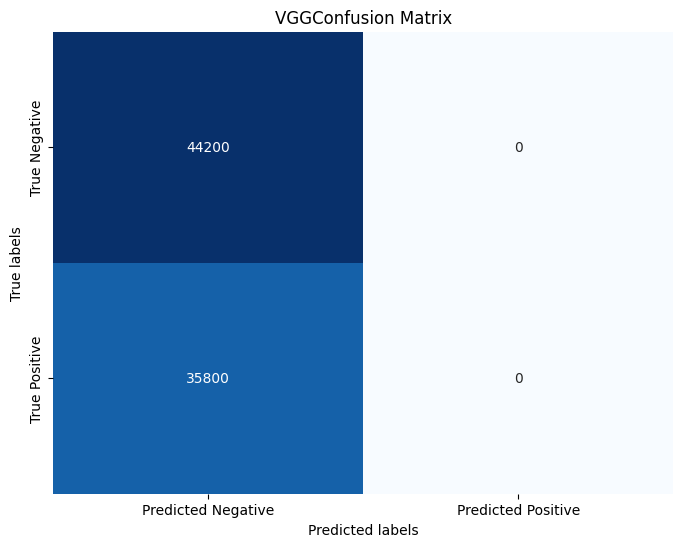

Accuracy: 0.5525
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
print('!!! Net Test Results !!!')
compute_metrics(labels, net_preds.round(), 'VGG', 'vgg')